## 10 possible stats/vizs

1. time line of wins & losses
    - shortest/longest longest streak before loss
    - x axis date, y axis point differential
2. dig into territory and possession
3. passing & offloads
4. attack - kicks from hand, meters, runs, clean breaks, defenders beaten
5. set piece play
6. penalities
7. tackling
8. breakdown effectiveness
9. location, time, tourney
10. points, tries, penalties



| Column                | Num Null |
|:----------------------|:---------|
| nz_drop_goal_miss     | 5        |
| nz_drop_goal_att      | 6        |
| opp_drop_goal_miss    | 6        |
| opp_drop_goal_att     | 6        |
| nz_passes             | 8        |
| opp_passes            | 8        |
| nz_possession_1h      | 29       |
| nz_possession_2h      | 29       |
| nz_possession_total   | 19       |
| opp_possession_1h     | 29       |
| opp_possession_2h     | 29       |
| opp_possession_total  | 19       |
| nz_territory_1h       | 32       |
| nz_territory_2h       | 32       |
| nz_territory_total    | 22       |
| opp_territory_1h      | 32       |
| opp_territory_2h      | 32       |
| opp_territory_total   | 22       |
| nz_maul_perc          | 20       |
| opp_maul_perc         | 11       |
| nz_freekick_conceded  | 90       |
| opp_freekick_conceded | 90       |

### load data

In [1]:
ls

LICENSE                  clean_df_complete.csv    statsguru-query.png
README.md                complete_df.csv          statsguru_scraper_ex.py
checklist.md             infograph_examples/      test.csv
clean_data.ipynb         pca.py                   visualizations.ipynb
clean_data.py            scrape.py


In [2]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

plt.style.use('ggplot')

In [3]:
df = pd.read_csv('clean_df_complete.csv', parse_dates=['date'])

In [38]:
dfW = df[df.result == 'W']
dfL = df[df.result != 'W']

print('Wins DF shape: ', dfW.shape)
print('Loses DF shape: ', dfL.shape)

Wins DF shape:  (117, 118)
Loses DF shape:  (20, 118)


### timeline of wins & losses

In [7]:
df['year'] = df.date.dt.year

df1 = df[['date','point_diff', 'result', 'year']]
df1.set_index('date', inplace=True)
print(df1.head())

dfW1 = df1[df1.result == 'W']
dfL1 = df1[df1.result == 'L']
dfD1 = df1[df1.result == 'D']

            point_diff result  year
date                               
2008-06-21          32      W  2008
2008-07-05          11      W  2008
2008-07-12          -2      L  2008
2008-07-26         -15      L  2008
2008-08-02          29      W  2008


In [8]:
df09 = df1[df1.year == 2009]
print(df09.head())

dfW09 = df09[df09.result == 'W']
dfL09 = df09[df09.result == 'L']
dfD09 = df09[df09.result == 'D']

            point_diff result  year
date                               
2009-06-13          -5      L  2009
2009-06-20           4      W  2009
2009-06-27          21      W  2009
2009-07-18           6      W  2009
2009-07-25          -9      L  2009


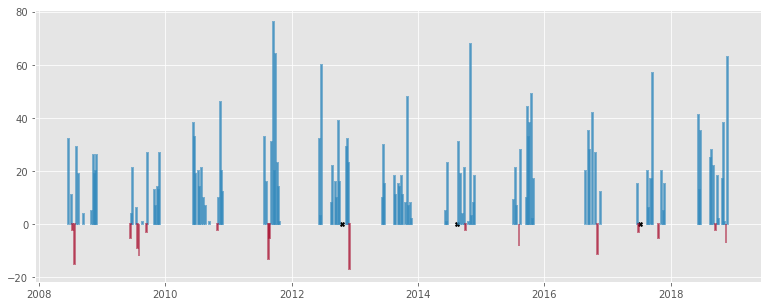

In [9]:
from IPython.core.pylabtools import figsize

colors = ["#348ABD", "#A60628"]

plt.figure(figsize=(13,5))
plt.bar(dfW1.index, dfW1.point_diff, width=6, alpha=.6, color=colors[0],
        edgecolor=colors[0],
        linewidth=2)
plt.bar(dfL1.index, dfL1.point_diff, width=5, alpha=.5, color=colors[1],
        edgecolor=colors[1],
        linewidth=2) 
plt.scatter(dfD1.index, dfD1.point_diff, s=20, c='black', marker='X')

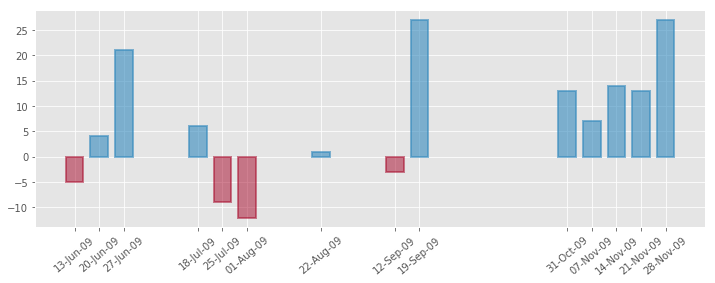

In [10]:
from IPython.core.pylabtools import figsize
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%d-%b-%y')

colors = ["#348ABD", "#A60628"]
_xticks = [df09.index.min(), df09.index.max()]

fig, ax = plt.subplots(figsize=(12,4))
# plt.figure()
ax.bar(dfW09.index, dfW09.point_diff, width=5, alpha=.6, color=colors[0],
        edgecolor=colors[0],
        linewidth=2)
ax.bar(dfL09.index, dfL09.point_diff, width=5, alpha=.5, color=colors[1],
        edgecolor=colors[1],
        linewidth=2) 
ax.scatter(dfD09.index, dfD09.point_diff, s=20, c='black', marker='X')
# ax.set_xlim('05-Jun-09', '05-Dec-09')
ax.set_xticks(df09.index)
ax.set_xticklabels(df09.index, rotation=40)
ax.xaxis.set_major_formatter(myFmt)

Use the above plots as general framework. Need to clean up design, condense space between date gaps, or plot sequence of individiual years.

### Number of Ws, Ds, & Ls 

#### by team / location or venue / by game type (tournament)

In [11]:
pd.set_option('display.max_rows', 1000) 

In [12]:
df2 = df[['date','opp','location','tournament','result']]

df2

,date,opp,location,tournament,result
0,2008-06-21,England,Christchurch,ENGLAND TOUR,W
1,2008-07-05,South Africa,Wellington,TRI NATIONS,W
2,2008-07-12,South Africa,Dunedin,TRI NATIONS,L
3,2008-07-26,Australia,Sydney,TRI NATIONS,L
4,2008-08-02,Australia,Auckland,TRI NATIONS,W
5,2008-08-16,South Africa,Cape Town,TRI NATIONS,W
6,2008-09-13,Australia,Brisbane,TRI NATIONS,W
7,2008-11-01,Australia,Hong Kong,AUSTRALIA TOUR / NEW ZEALAND TOUR,W
8,2008-11-08,Scotland,Murrayfield,NEW ZEALAND TOUR,W
9,2008-11-15,Ireland,Croke Park,NEW ZEALAND TOUR,W


In [13]:
df.tournament.value_counts()

NEW ZEALAND TOUR                      36
RUGBY CHAMPIONSHIP                    33
TRI NATIONS                           22
FRANCE TOUR                            8
RUGBY WORLD CUP                        6
IRELAND TOUR                           4
ENGLAND TOUR                           4
RUGBY WORLD CUP , Pool A               4
RUGBY WORLD CUP , Pool C               4
AUSTRALIA TOUR                         3
AUSTRALIA TOUR / NEW ZEALAND TOUR      3
BRITISH AND IRISH LIONS TOUR           3
BLEDISLOE CUP / RUGBY CHAMPIONSHIP     2
WALES TOUR                             2
IRELAND TOUR / NEW ZEALAND TOUR        1
ITALY TOUR                             1
BLEDISLOE CUP                          1
Name: tournament, dtype: int64

In [14]:
tourney_renames = {"NEW ZEALAND TOUR": "November Series",
                    "RUGBY CHAMPIONSHIP": "Rugby Championship / Tri Nations",
                    "TRI NATIONS": "Rugby Championship / Tri Nations",
                    "FRANCE TOUR": "June Series",
                    "RUGBY WORLD CUP": "Rugby World Cup",
                    "ENGLAND TOUR": "June Series",
                    "IRELAND TOUR": "June Series",
                    "RUGBY WORLD CUP , Pool A": "Rugby World Cup",
                    "RUGBY WORLD CUP , Pool C": "Rugby World Cup",
                    "AUSTRALIA TOUR / NEW ZEALAND TOUR": "November Series",
                    "AUSTRALIA TOUR": "Bledisloe Cup",
                    "BRITISH AND IRISH LIONS TOUR": "June Series",
                    "WALES TOUR": "June Series",
                    "BLEDISLOE CUP / RUGBY CHAMPIONSHIP": "Bledisloe Cup",
                    "BLEDISLOE CUP": "Bledisloe Cup",
                    "IRELAND TOUR / NEW ZEALAND TOUR": "November Series",
                    "ITALY TOUR": "June Series"}

df['test_type'] = df.tournament.apply(lambda x: tourney_renames[x])

df.test_type.value_counts()

Rugby Championship / Tri Nations    55
November Series                     40
June Series                         22
Rugby World Cup                     14
Bledisloe Cup                        6
Name: test_type, dtype: int64

In [15]:
## per wikipedia articles, these are the official bledisloe cup matches  
## https://en.wikipedia.org/wiki/Bledisloe_Cup#Matches

bled_mask = [132, 127, 126, 119, 116, 115, 109, 105, 97, 96, 88, 83, 82, 74, 69, 68, 90, 55, \
             54, 43, 41, 35, 34, 32, 31, 21, 20, 18, 15, 7, 6, 4, 3]

bled_mask.sort()

In [16]:
df.loc[bled_mask, 'test_type'] ='Bledisloe Cup'

In [17]:
df.test_type.value_counts()

November Series                     34
Rugby Championship / Tri Nations    34
Bledisloe Cup                       33
June Series                         22
Rugby World Cup                     14
Name: test_type, dtype: int64

In [18]:
df['count'] = 1

df.groupby(['opp', 'result'])['count'].sum()

opp                       result
Argentina                 W         13
Australia                 D          2
                          L          5
                          W         28
British and Irish Lions   D          1
                          L          1
                          W          1
Canada                    W          1
England                   L          1
                          W         10
France                    L          1
                          W         13
Georgia                   W          1
Ireland                   L          2
                          W          8
Italy                     W          4
Japan                     W          3
Namibia                   W          1
Samoa                     W          1
Scotland                  W          5
South Africa              L          7
                          W         17
Tonga                     W          2
United States of America  W          1
Wales                     W    

In [19]:
df.groupby(['test_type', 'result'])['count'].sum()

test_type                         result
Bledisloe Cup                     D          1
                                  L          5
                                  W         27
June Series                       D          1
                                  L          2
                                  W         19
November Series                   D          1
                                  L          3
                                  W         30
Rugby Championship / Tri Nations  L          7
                                  W         27
Rugby World Cup                   W         14
Name: count, dtype: int64

In [36]:
df.groupby(['result', 'location'])['count'].sum()

result  location          
D       Auckland               1
        Brisbane               1
        Sydney                 1
L       Bloemfontein           1
        Brisbane               2
        Chicago                1
        Dunedin                2
        Durban                 1
        Hamilton               1
        Hong Kong              1
        Johannesburg           1
        Lansdowne Road         1
        Port Elizabeth         1
        Sydney                 2
        Twickenham             1
        Wellington             2
W       Apia                   1
        Auckland              20
        Brisbane               2
        Buenos                 1
        Cape Town              1
        Chicago                1
        Christchurch           7
        Croke Park             1
        Dunedin                6
        Durban                 1
        Hamilton               6
        Hong Kong              1
        Johannesburg           4
        La Plata

In [21]:
df.groupby(['neutral_loc', 'result'])['count'].sum()

neutral_loc  result
0            D           3
             L          15
             W         106
1            L           2
             W          11
Name: count, dtype: int64

In [22]:
def map_fxn(lst):
    if lst[1] == 1:
        return 'neutral'
    elif lst[0] == 'New Zealand':
        return 'home'
    else:
        return 'away'
    
df['local_adv'] = df[['home_team', 'neutral_loc']].apply(lambda x: map_fxn(x), axis=1)

df.groupby(['local_adv', 'result'])['count'].sum()

local_adv  result
away       D          2
           L         10
           W         50
home       D          1
           L          5
           W         56
neutral    L          2
           W         11
Name: count, dtype: int64

In [23]:
df.groupby(['result', 'local_adv'])['count'].sum()

result  local_adv
D       away          2
        home          1
L       away         10
        home          5
        neutral       2
W       away         50
        home         56
        neutral      11
Name: count, dtype: int64

In [24]:
local_adv_grp = _

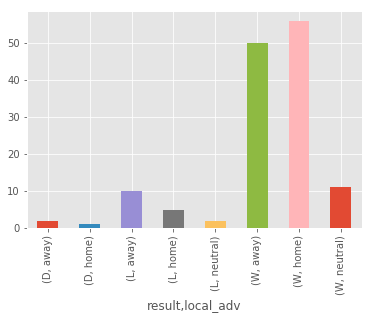

In [30]:
local_adv_grp.plot.bar()

In [31]:
loc_grp2 = df.groupby(['local_adv', 'result'])['count'].sum()

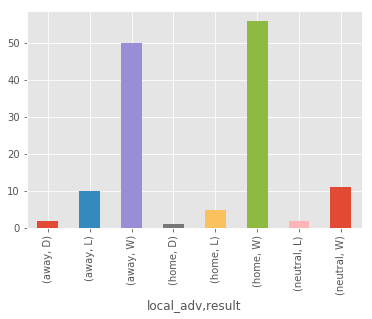

In [32]:
loc_grp2.plot.bar()

In [33]:
loc_grp2.index

MultiIndex(levels=[['away', 'home', 'neutral'], ['D', 'L', 'W']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2], [0, 1, 2, 0, 1, 2, 1, 2]],
           names=['local_adv', 'result'])

### territory & possession 

In [85]:
dfW[['nz_territory_total', 'opp_territory_total']].describe()

,nz_territory_total,opp_territory_total
count,98.00000,98.00000
mean,0.52398,0.47602
std,0.10225,0.10225
min,0.30000,0.20000
25%,0.44000,0.41000
50%,0.53500,0.46500
75%,0.59000,0.56000
max,0.80000,0.70000


In [86]:
dfL[['nz_territory_total', 'opp_territory_total']].describe()

,nz_territory_total,opp_territory_total
count,17.000000,17.000000
mean,0.521765,0.478235
std,0.107426,0.107426
min,0.330000,0.210000
25%,0.470000,0.420000
50%,0.510000,0.490000
75%,0.580000,0.530000
max,0.790000,0.670000


In [97]:
statsW = dfW[['nz_possession_total', 'opp_possession_total']].describe()
statsW

,nz_possession_total,opp_possession_total
count,101.000000,101.000000
mean,0.522178,0.477822
std,0.100584,0.100584
min,0.340000,0.000000
25%,0.450000,0.420000
50%,0.520000,0.480000
75%,0.580000,0.550000
max,1.000000,0.660000


In [90]:
statsL = dfL[['nz_possession_total', 'opp_possession_total']].describe()

In [91]:
print(type(statsW))
statsW.head()

<class 'pandas.core.frame.DataFrame'>


,nz_possession_total,opp_possession_total
count,101.000000,101.000000
mean,0.522178,0.477822
std,0.100584,0.100584
min,0.340000,0.000000
25%,0.450000,0.420000


In [100]:
print(statsW.loc['std'])
print(statsW.loc['mean'])

nz_possession_total     0.100584
opp_possession_total    0.100584
Name: std, dtype: float64
nz_possession_total     0.522178
opp_possession_total    0.477822
Name: mean, dtype: float64


In [176]:
print(statsW.loc['50%'])
print(statsW.loc['75%'])

nz_possession_total     0.52
opp_possession_total    0.48
Name: 50%, dtype: float64
nz_possession_total     0.58
opp_possession_total    0.55
Name: 75%, dtype: float64


0.13


([<matplotlib.axis.XTick at 0x11c682b00>,
 <a list of 3 Text xticklabel objects>)

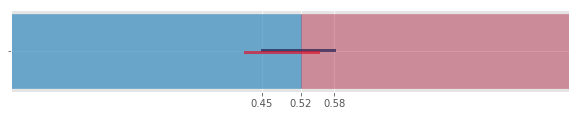

In [191]:
_xerr=statsW.loc['75%'][0]-statsW.loc['25%'][0]
print(_xerr)

_x = np.arange(.45, .59, .01)
_xO = np.arange(.42, .55, .01)
_y = np.ones(_x.shape[0])
_yO = np.ones(_xO.shape[0])
_y += .01
_yO -= .01


plt.figure(figsize=(10,1.5))
plt.barh(1,statsW.loc['50%'][0], color=colors[0], 
        edgecolor=colors[0],
        linewidth=.5,
        alpha=0.7)
plt.barh(1,statsW.loc['50%'][1], left=statsW.loc['50%'][0], color=colors[1], 
         edgecolor=colors[1],
        linewidth=.5,
        alpha=0.4)
plt.plot(_x, _y, color='#201E50', linewidth=3, alpha=0.7)
plt.plot(_xO, _yO, color='#DB162F', linewidth=3, alpha=0.7)
plt.xlim(0,1)
plt.yticks([1],[''])
plt.xticks([statsW.loc['25%'][0], statsW.loc['50%'][0], statsW.loc['75%'][0]])

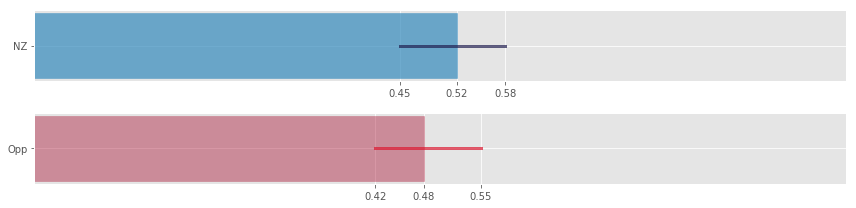

In [192]:
_xerr=statsW.loc['75%'][0]-statsW.loc['25%'][0]

_x = np.arange(.45, .59, .01)
_xO = np.arange(.42, .55, .01)
_y = np.ones(_x.shape[0])
_yO = np.ones(_xO.shape[0])

plt.figure(figsize=(12,3))

ax = plt.subplot(211)

plt.barh(1,statsW.loc['50%'][0], color=colors[0], 
        edgecolor=colors[0],
        linewidth=.5,
        alpha=0.7)
plt.plot(_x, _y, color='#201E50', linewidth=3, alpha=0.7)
plt.xlim(0,1)
plt.yticks([1],['NZ'])
plt.xticks([statsW.loc['25%'][0], statsW.loc['50%'][0], statsW.loc['75%'][0]])

ax = plt.subplot(212)
plt.barh(1,statsW.loc['50%'][1], color=colors[1], 
         edgecolor=colors[1],
        linewidth=.5,
        alpha=0.4)
plt.plot(_xO, _yO, color='#DB162F', linewidth=3, alpha=0.7)
plt.xlim(0,1)
plt.yticks([1],['Opp'])
plt.xticks([statsW.loc['25%'][1], statsW.loc['50%'][1], statsW.loc['75%'][1]])

plt.tight_layout()

In [7]:
df[['result', 'opp', 'nz_passes', 'opp_passes', 'nz_offloads', 'opp_offloads','nz_metres_run_w_ball', 'opp_metres_run_w_ball']].tail(20)

,result,opp,nz_passes,opp_passes,nz_offloads,opp_offloads,nz_metres_run_w_ball,opp_metres_run_w_ball
117,W,Argentina,182.0,110.0,9,2,626,240
118,W,South Africa,196.0,112.0,11,8,564,252
119,L,Australia,126.0,182.0,12,5,266,494
120,W,France,118.0,101.0,7,12,305,344
121,W,Scotland,117.0,191.0,10,6,496,404
122,W,Wales,154.0,272.0,7,14,496,442
123,W,France,169.0,77.0,10,10,615,243
124,W,France,141.0,177.0,13,18,523,511
125,W,France,204.0,176.0,8,13,564,444
126,W,Australia,224.0,160.0,12,9,671,444


In [21]:
dfW[['result', 'opp', 'nz_passes', 'opp_passes', 'nz_offloads', 'opp_offloads','nz_metres_run_w_ball', 'opp_metres_run_w_ball']].describe()

,nz_passes,opp_passes,nz_offloads,opp_offloads,nz_metres_run_w_ball,opp_metres_run_w_ball
count,111.000000,111.000000,117.000000,117.000000,117.000000,117.000000
mean,151.666667,123.513514,10.965812,7.632479,488.880342,315.017094
std,40.766594,44.176066,5.214257,4.528832,144.051366,120.204351
min,48.000000,30.000000,1.000000,0.000000,177.000000,57.000000
25%,119.500000,93.000000,7.000000,4.000000,389.000000,222.000000
50%,149.000000,122.000000,11.000000,7.000000,483.000000,296.000000
75%,181.000000,146.500000,14.000000,10.000000,567.000000,403.000000
max,235.000000,272.000000,32.000000,21.000000,949.000000,722.000000


In [22]:
dfL[['result', 'opp', 'nz_passes', 'opp_passes', 'nz_offloads', 'opp_offloads','nz_metres_run_w_ball', 'opp_metres_run_w_ball']].describe()

,nz_passes,opp_passes,nz_offloads,opp_offloads,nz_metres_run_w_ball,opp_metres_run_w_ball
count,18.000000,18.000000,20.00000,20.00000,20.000000,20.000000
mean,145.222222,113.777778,8.95000,5.95000,424.250000,323.850000
std,46.530895,47.740174,3.70597,2.37254,141.292111,97.435147
min,86.000000,39.000000,1.00000,2.00000,173.000000,151.000000
25%,107.500000,69.250000,6.75000,4.00000,315.250000,255.500000
50%,137.000000,115.000000,9.00000,5.50000,440.500000,323.500000
75%,176.750000,141.500000,11.25000,8.00000,506.500000,373.500000
max,257.000000,208.000000,15.00000,10.00000,680.000000,516.000000


In [28]:
df['nz_metres_run_per_pass'] = df['nz_metres_run_w_ball']/(df['nz_passes']+df['nz_offloads'])

In [31]:
dfW.nz_metres_run_per_pass.describe()

count    111.000000
mean       3.092086
std        0.689884
min        1.741379
25%        2.591844
50%        3.049180
75%        3.433029
max        5.418182
Name: nz_metres_run_per_pass, dtype: float64

In [32]:
dfL.nz_metres_run_per_pass.describe()

count    18.000000
mean      2.729438
std       0.824542
min       1.543379
25%       2.146698
50%       2.588030
75%       3.264910
max       4.540541
Name: nz_metres_run_per_pass, dtype: float64

In [15]:
df['nz_passes_per_phase'] = df['nz_passes']/(df['nz_rucks_total']+df['nz_turnovers_conceded'])
df['nz_offloads_per_phase'] = df['nz_offloads']/(df['nz_rucks_total']+df['nz_turnovers_conceded'])
df['opp_passes_per_phase'] = df['opp_passes']/(df['opp_rucks_total']+df['opp_turnovers_conceded'])
df['opp_offloads_per_phase'] = df['opp_offloads']/(df['opp_rucks_total']+df['opp_turnovers_conceded'])

df['nz_metres_per_phase'] = df['nz_metres_run_w_ball']/(df['nz_rucks_total']+df['nz_turnovers_conceded'])
df['opp_metres_per_phase'] = df['opp_metres_run_w_ball']/(df['opp_rucks_total']+df['opp_turnovers_conceded'])

In [13]:
dfW.nz_passes_per_phase.describe()

count    111.000000
mean       1.638423
std        0.360419
min        0.600000
25%        1.417569
50%        1.649123
75%        1.888832
max        2.695122
Name: nz_passes_per_phase, dtype: float64

In [14]:
dfL.nz_passes_per_phase.describe()

count    18.000000
mean      1.472409
std       0.302088
min       1.026786
25%       1.253765
50%       1.438292
75%       1.568445
max       1.988889
Name: nz_passes_per_phase, dtype: float64

In [17]:
dfW.nz_metres_per_phase.describe()

count    117.000000
mean       5.398243
std        1.664444
min        1.824742
25%        4.185714
50%        5.067961
75%        6.285714
max       11.573171
Name: nz_metres_per_phase, dtype: float64

In [18]:
dfL.nz_metres_per_phase.describe()

count    20.000000
mean      4.318147
std       1.311237
min       2.156250
25%       3.193155
50%       4.451111
75%       5.448684
max       6.415094
Name: nz_metres_per_phase, dtype: float64

In [19]:
df['nz_rucks_plus_tover'] = df['nz_rucks_total']+df['nz_turnovers_conceded']
df['opp_rucks_plus_tover'] = df['opp_rucks_total']+df['opp_turnovers_conceded']

In [20]:
df[['nz_runs', 'nz_rucks_plus_tover']].tail()

,nz_runs,nz_rucks_plus_tover
132,111,81
133,126,103
134,151,138
135,159,146
136,146,95


In [35]:
df['opp_rundist_ratio'] = df.opp_metres_run_w_ball / df.nz_metres_run_w_ball

In [39]:
df.opp_rundist_ratio.describe()

count    137.000000
mean       0.735512
std        0.373071
min        0.101064
25%        0.461140
50%        0.694056
75%        0.929293
max        2.044554
Name: opp_rundist_ratio, dtype: float64

In [40]:
dfW.opp_rundist_ratio.describe()

count    117.000000
mean       0.713793
std        0.366225
min        0.101064
25%        0.446809
50%        0.655285
75%        0.920000
max        2.044554
Name: opp_rundist_ratio, dtype: float64

In [41]:
dfL.opp_rundist_ratio.describe()

count    20.000000
mean      0.862570
std       0.396876
min       0.323340
25%       0.525052
50%       0.867545
75%       1.101264
max       1.857143
Name: opp_rundist_ratio, dtype: float64

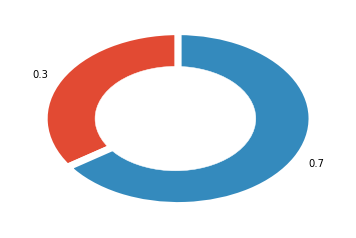

In [63]:
# create data
med = dfW.opp_rundist_ratio.describe().loc['50%']
size_of_groups=[1-med, med]
names = [1-round(med,1), round(med, 1)]
 
# Create a pieplot
# plt.pie(size_of_groups)
plt.pie(size_of_groups, labels=names, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' }, startangle=90)
#plt.show()
 
# add a circle at the center
my_circle=plt.Circle( (-0.02,0), 0.6, color='white')

p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

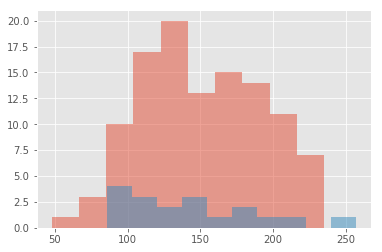

In [20]:
dfW.nz_passes.hist(alpha=.5)
dfL.nz_passes.hist(alpha=.5)

In [ ]:
dfW['nz_final_score'].hist(bins=100)
dfL['nz_final_score'].hist(bins=100)

In [ ]:
dfW['point_diff'].hist(bins=50)
dfL['point_diff'].hist(bins=50)

In [ ]:
dfW['nz_tries'].hist(bins=20)
dfL['nz_tries'].hist(bins=20)

In [ ]:
dfW.nz_offloads.hist(bins=50)
dfL.nz_offloads.hist(bins=50)

In [ ]:
dfW.turnover_diff.hist(bins=50)
dfL.turnover_diff.hist(bins=50)

In [ ]:
dfW.nz_territory_total.hist(bins=50)
dfL.nz_territory_total.hist(bins=50)

In [ ]:
dfW.opp_possession_total.hist(bins=50)
dfL.opp_possession_total.hist(bins=50)

In [ ]:
dfW.opp_territory_1h.hist(bins=50)
dfL.opp_territory_1h.hist(bins=50)

In [ ]:
dfW.opp_territory_2h.hist(bins=50)
dfL.opp_territory_2h.hist(bins=50)

In [ ]:
dfL.opp_territory_total.hist(bins=50)
dfL.nz_territory_total.hist(bins=50)

In [ ]:
dfW[['nz_possession_1h'       
,'nz_possession_2h'          
,'nz_possession_total'     
,'opp_possession_1h'       
,'opp_possession_2h'         
,'opp_possession_total'      
,'nz_territory_1h'           
,'nz_territory_2h'           
,'nz_territory_total'        
,'opp_territory_1h'          
,'opp_territory_2h'          
,'opp_territory_total']].head()

In [ ]:
avg_pos_1h_w = dfW['nz_possession_1h'].mean()
avg_pos_2h_w = dfW['nz_possession_2h'].mean()
avg_pos_tot_w = dfW['nz_possession_total'].mean()

avg_pos_1h_l = dfL['nz_possession_1h'].mean()
avg_pos_2h_l = dfL['nz_possession_2h'].mean()
avg_pos_tot_l = dfL['nz_possession_total'].mean()

print(f'avg pos 1h win: {round(avg_pos_1h_w,3)}')
print(f'avg pos 2h win: {round(avg_pos_2h_w,3)}')
print(f'avg pos total win: {round(avg_pos_tot_w,3)}')
print(f'avg pos 1h loss: {round(avg_pos_1h_l,3)}')
print(f'avg pos 2h loss: {round(avg_pos_2h_l,3)}')
print(f'avg pos total loss: {round(avg_pos_tot_l,3)}')